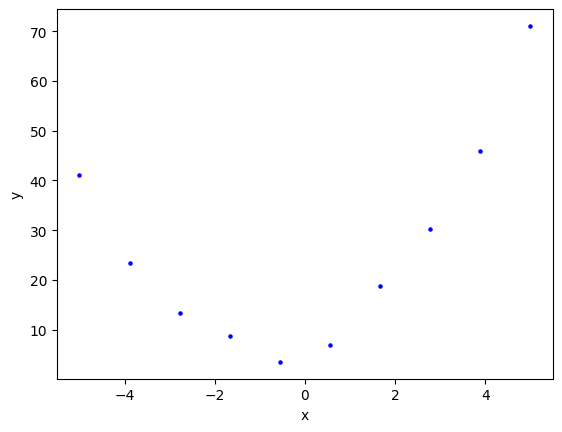

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import torch.nn as nn
import torch.optim as optim
import torch

x = np.array([-5. , -3.88888889, -2.77777778, -1.66666667, -0.55555556, 0.55555556, 1.66666667, 2.77777778, 3.88888889, 5. ])
y = np.array([40.99342831, 23.30371831, 13.39414251, 8.60161527, 3.48231053, 6.8156767 , 18.71398119, 30.30030156, 45.97463148, 71.08512009])

plt.scatter(x,y,s = 5, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

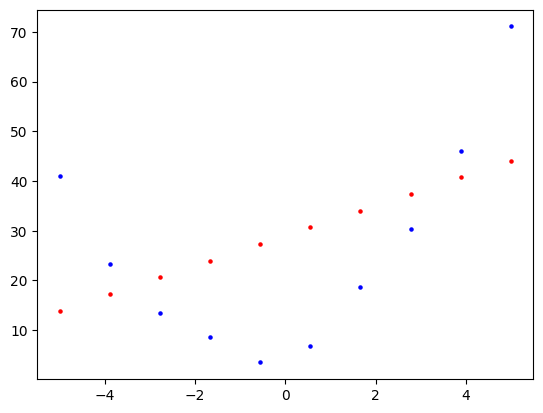

In [3]:
x = x.reshape(-1,1)

Model = SGDRegressor(eta0 = 0.1)
Model.fit(x,y)

y_pred = Model.predict(x)

plt.scatter(x,y,s = 5, color = 'blue')
plt.scatter(x,y_pred,s = 5, color = 'red')
plt.show()

Step 0, loss=0.057716, a=0.1018, b=0.1988
Step 100, loss=0.035982, a=0.3985, b=0.2964
Step 200, loss=0.025242, a=0.5980, b=0.3373
Step 300, loss=0.017880, a=0.7614, b=0.3717
Step 400, loss=0.012832, a=0.8959, b=0.4014
Step 500, loss=0.009369, a=1.0064, b=0.4274
Step 600, loss=0.006994, a=1.0970, b=0.4501
Step 700, loss=0.005363, a=1.1712, b=0.4702
Step 800, loss=0.004242, a=1.2317, b=0.4882
Step 900, loss=0.003472, a=1.2811, b=0.5043
Step 1000, loss=0.002941, a=1.3211, b=0.5189
Step 1100, loss=0.002574, a=1.3534, b=0.5323
Step 1200, loss=0.002321, a=1.3793, b=0.5447
Step 1300, loss=0.002144, a=1.3999, b=0.5561
Step 1400, loss=0.002020, a=1.4162, b=0.5669
Step 1500, loss=0.001932, a=1.4288, b=0.5771
Step 1600, loss=0.001870, a=1.4385, b=0.5867
Step 1700, loss=0.001824, a=1.4456, b=0.5960
Step 1800, loss=0.001790, a=1.4508, b=0.6049
Step 1900, loss=0.001764, a=1.4542, b=0.6135
Step 2000, loss=0.001744, a=1.4563, b=0.6218
Step 2100, loss=0.001728, a=1.4572, b=0.6300
Step 2200, loss=0.0017

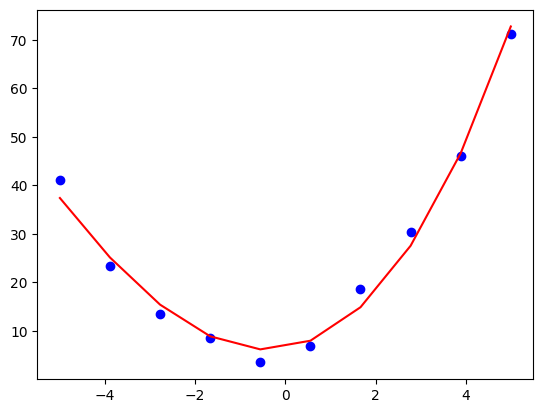

In [4]:
a = nn.Parameter(torch.tensor(0.1))
b = nn.Parameter(torch.tensor(0.2))
c = nn.Parameter(torch.tensor(0.2))
d = nn.Parameter(torch.tensor(0.2))

x = torch.from_numpy(x).float().view(-1, 1)
y = torch.from_numpy(y).float().view(-1, 1)

# Normalize
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()
x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

optimizer = optim.SGD([a, b,c,d], lr=0.1)  # now we can use a higher lr
criterion = nn.MSELoss()


for i in range(10000):
    optimizer.zero_grad()
    y_pred = x ** 3 * a + b * x ** 2 + c * x + d
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f"Step {i}, loss={loss.item():.6f}, a={a.item():.4f}, b={b.item():.4f}")


with torch.no_grad():
    A = a.item() * ((y_max - y_min).item() / (x_max - x_min).item())
    B = y_min.item() + (y_max - y_min).item() * (b.item() - a.item() * (x_min.item() / (x_max - x_min).item()))
print(f"Original-scale: slope={A:.6f}, intercept={B:.6f}")

# Plot in original scale
x_denorm = x * (x_max - x_min) + x_min
y_denorm = y * (y_max - y_min) + y_min
y_pred_denorm = y_pred.detach() * (y_max - y_min) + y_min

plt.scatter(x_denorm.numpy(), y_denorm.numpy(),  color='blue')
plt.plot(x_denorm.numpy(), y_pred_denorm.numpy(), color='red')
plt.show()



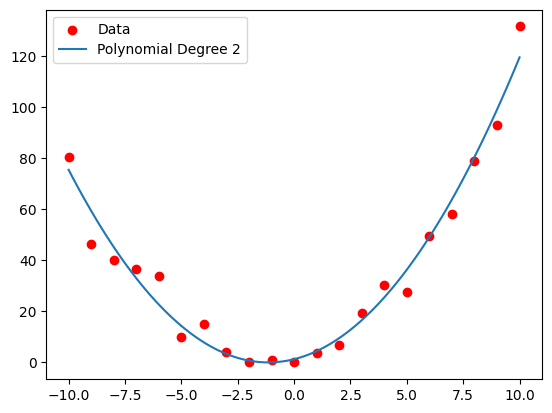

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

# Your data
X = np.array([1,2,3,4,5,6,7,8,9,10,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]).reshape(-1, 1)
Y = np.array([1,4,9,16,25,36,49,64,81,100,0,1,4,9,16,25,36,49,64,81,100])

noise = np.array([random.random()*X[i][0]*4 for i in range(len(Y))])

Y = Y + noise

# Step 1: Transform features to polynomial features
degree =2  # you can try 9 for extreme overfitting
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Step 2: Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_poly, Y)

# Predict
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_fit = model.predict(poly.transform(X_fit))

# Plot
plt.scatter(X, Y, color='red', label='Data')
plt.plot(X_fit, Y_fit, label=f'Polynomial Degree {degree}')
plt.legend()
plt.show()
